<a href="https://colab.research.google.com/github/npgeorge/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Sprint_3_Prep_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
scipy.stats.bernoulli?

Object `scipy.stats.bernoulli` not found.


##Sprint 3 Prep Notebook Overview

Topics that may show up on Sprint Challenge 3:

Probability, Statistics, and Inference
- demonstrate understanding of fundamental concepts of set theory and probability, 
  including permutations, combinations, expected value, variance, binomial distribution,
  and Bernoulli trial

- explain the importance of statistics in the context of informing a practical 
  and reliable understanding of data

Sampling, Confidence Int, and Hypo Testing
- use hypothesis testing to determine an outcome is significant or just the 
  result of chance

- determine the level of confidence for a possible outcome

Introduction to Bayesian Inference
- be able to derive Bayes' theorem from the Law of Conditional Probability
- calculate Bayesian confidence intervals

Real-World Experiment Design
- deploy a simple static (front-end) A/B-instrumented webpage
- evaluate and summarize findings from real-world A/B test data

###Fundamentla Concepts

**Set Theory**

A set is a collection of things (elements).
Example 
The following sets are used in this book:

The set of natural numbers, ℕ={1,2,3,⋯}.

The set of integers, ℤ={⋯,−3,−2,−1,0,1,2,3,⋯}.

The set of rational numbers ℚ.

The set of real numbers ℝ.

Closed intervals on the real line. For example, [2,3] is the set of all real numbers x such that 2≤x≤3.

Open intervals on the real line. For example (−1,3) is the set of all real numbers x such that {−1<x<3}.

Similarly, [1,2) is the set of all real numbers x such that {1≤x<2.}

The set of complex numbers ℂ is the set of numbers in the form of a+bi, where a,b∈ℝ, and i=sqrt(-1).

**Probability:**

A probability is the *likelihood* of an event occurring.

We assign a probability measure P(A) to an event A. This is a value between 0 and 1 that shows how likely the event is. If P(A) is close to 0, it is very unlikely that the event A occurs. On the other hand, if P(A) is close to 1, A is very likely to occur.

P(A∩B)=P(A and B)=P(A,B),

P(A∪B)=P(A or B).

**Permutations:**

A permutation is a method to calculate the number of events occurring where order matters. To calculate a permutation, you will need to use the formula 

nPr = n! / (n - r)!. 

In this equation, n represents the number of items to choose from and r represents how many items are being chosen.

**Combinations:**

Combinations are a way to calculate the total outcomes of an event where order of the outcomes does not matter. 

nCr = n! / r! * (n - r)! 

Where n represents the total number of items, and r represents the number of items being chosen at a time.

**Expected Value:**

E(x)=∑ xi*P(xi) 

In statistics and probability analysis, the expected value is calculated by multiplying each of the possible outcomes by the likelihood each outcome will occur and then summing all of those values.

Take, for example, a normal six-sided die. Once you roll the die, it has an equal one-sixth chance of landing on one, two, three, four, five, or six. Given this information, the calculation is straightforward:

(1/6 * 1) + (1/6 * 2) + (1/6 * 3) + (1/6 * 4) + (1/6 * 5) + (1/6 * 6) = 3.5

If you were to roll a six-sided die an infinite amount of times, you see the average value equals 3.5.

**Variance:**

Variance is the expectation of the squared deviation of a random variable from its mean.

Var(X) = Σx^2p − μ2

Informally, it measures how far a set of (random) numbers are spread out from their average value.

in code: {sample.var()}

**Binomial Distribution & Bernoulli Trial:**

A binomial experiment is a statistical experiment that has the following properties:

The experiment consists of n repeated trials.
Each trial can result in just two possible outcomes. We call one of these outcomes a success and the other, a failure.
The probability of success, denoted by P, is the same on every trial.
The trials are independent; that is, the outcome on one trial does not affect the outcome on other trials.
Consider the following statistical experiment. You flip a coin 2 times and count the number of times the coin lands on heads.

np.random.binomial(n, p, size=None)

or

scipy.stats.binom : probability density function, distribution or cumulative density function, etc.

binomial(n, p, size=None)

Draw samples from a binomial distribution.

Samples are drawn from a binomial distribution with specified
parameters, n trials and p probability of success where
n an integer >= 0 and p is in the interval [0,1]. (n may be
input as a float, but it is truncated to an integer in use)

A Bernoulli trial (or binomial trial) is a random experiment with exactly two possible outcomes, "success" and "failure", in which the probability of success is the same every time the experiment is conducted.

In [0]:
from IPython.display import display, Image

url = 'https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg'
example = Image(url=url, width=400)

display(example)

###Explain the importance of statistics

*How does statistics inform a pracitcal and reliable understanding of data?*



**Statistical Significance:**

Using hypothesis testing methods. If the p value is less than the  level (typically 0.05), then the results are statistically significant.

The effect observed in the sample was unlikely to have occured due to chance alone. 

Strongly related to sample size. If the sample size is large enough, even tiny differences from the hypothesized value will be found statistically significant.

**Practical Significance**

Practical significance refers to the magnitude of the difference, which is known as the effect size. Results are practically significant when the difference is large enough to be meaningful in real life. What is meaningful may be subjective and may depend on the context.

In addition to the results of a hypothesis test, it is best to also report an appropriate confidence interval. 

The interval illustrates the size of the effect, and can help determine if the effect has any practical importance. 


##Sampling, Confidence Interval, & Hypothesis Testing (T-tests)

##Using hypothesis testing to determine if an outcome is significant or just the result of chance.

###Hypothesis Testing

The most important thing to remember is that its not up to you to pick the test, the question you want to answer is the one that picks the hypothesis test.

For example:

T-tests help you answer the question of whether the means of two samples are close to eachother. These are specifically designed to test for two means. 

P-value tells you whether that level of closeness is statistically significant. 

In [1]:
#we can determine this by checking for correlation (chi sq) between two sets
#two example below
#notice the P values
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [3]:
#generating a random sample test...
from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
#poisson(lambda, size) -> the higher to the right the further away the distribution moves
#so a lambda of 1, distribution is closer to 0, and with 5, moves away and to the right
sample = np.random.poisson(5, 1000)
sample

array([ 5,  2,  0,  5,  6,  3,  7,  4,  4,  5,  5,  8,  7,  9,  7, 12,  1,
        3,  8,  6,  3,  5,  1,  4,  2,  4,  4,  8,  6,  6,  6,  6,  7,  0,
        4,  2,  6,  4,  8,  3,  3,  7,  3,  6,  2,  5,  2,  2,  6,  3,  2,
        3,  7,  9,  6,  7,  2,  3,  6,  2,  4,  2,  3,  5,  4,  8, 11,  5,
       11,  2,  8, 11,  7,  2,  5,  4,  7, 10,  6,  5,  3,  2,  1,  1,  7,
        9,  4,  3,  5,  5,  6,  7,  4,  3,  1,  7,  5,  5, 14,  1,  8,  0,
        6,  2,  7,  2,  8,  6,  2,  6,  2,  9,  5,  4,  7,  7,  7,  2,  4,
        8, 10,  7,  8,  4,  4,  5,  5,  6,  5,  2,  4,  5,  7,  4, 10,  4,
        3,  9,  2,  6,  4,  4,  4,  7,  6,  7,  4,  2,  7,  1,  4,  4,  7,
        5,  2,  8,  4,  6,  4,  6,  4,  5,  3,  5,  4,  3,  3,  5,  6,  7,
        2,  7,  8,  3,  8,  3,  7,  6,  3,  6,  4,  2,  6,  6,  5,  6,  3,
        6,  5,  9,  7,  4,  4,  5,  3,  6,  2,  4,  2,  7,  5,  6,  6,  5,
        4,  7,  8,  3,  6,  3, 10,  8,  5,  8,  5,  6,  3,  5,  4,  4,  6,
        4, 11,  5,  6,  5

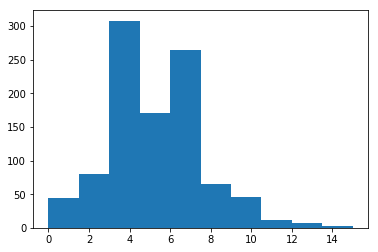

In [5]:
#this data is not normally distributed
import matplotlib.pyplot as plt
plt.hist(sample);

In [6]:
#running a normality test on it, is the data normally distributed?
print(normaltest(sample))  # Pretty clearly not normal due to high p value

NormaltestResult(statistic=53.45532530051912, pvalue=2.4678774905973204e-12)


In [7]:
#generating a normal distribution with a mean of 50 and std dev of 3
sample = np.random.normal(50, 3, 1000)
print(normaltest(sample)) 

NormaltestResult(statistic=1.0348680605762306, pvalue=0.5960480285857734)


#T-Test Assumptions

Null hypothesis is that the means of the two distributions are the same, and running this hypothesis of P-value that is less than 0.05.

In [17]:
from scipy.stats import ttest_ind
#so lets make two data sets and check the p-value
skittles_fac_1 = np.random.normal(50, 5, size=100)
skittles_fac_1 = skittles_fac_1.round().astype(int)
skittles_fac_1[:10]

array([52, 41, 51, 47, 42, 53, 49, 55, 52, 45])

In [18]:
#getting the mean
skittles_fac_1.mean()

50.29

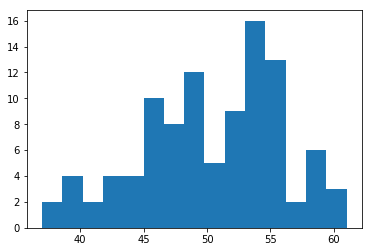

In [19]:
#first data set
plt.hist(skittles_fac_1, bins=15);

In [25]:
#second set of data or distribution
skittles_fac_2 = np.random.normal(49.3, 5.5, size=100)
skittles_fac_2 = skittles_fac_2.round().astype(int)
skittles_fac_2[:10]

array([52, 44, 51, 45, 46, 53, 51, 54, 50, 44])

In [26]:
skittles_fac_2.mean()

48.49

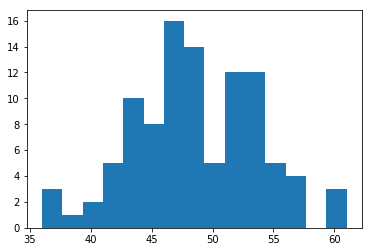

In [27]:
#plotting second data set
plt.hist(skittles_fac_2, bins=15);

In [28]:
#performing the t-test
ttest_ind(skittles_fac_1, skittles_fac_2)

Ttest_indResult(statistic=2.3819263642990087, pvalue=0.018169499723603544)

#T-Test Conclusions

In [0]:
#note if you change the sample size, say make it smaller
#the p-value will increase because your deviations from the mean will be greater on average
#pulling the means away from eachother results in a lower p-value
#increasing std deviation will increase p-value

#if the p-value is less than 0.05, you can claim it as significant
#if the p-value is greater than 0.05, you can claim its the result of chance

#T-test doesn't say anything about the difference variances (standard deviations) - only their means


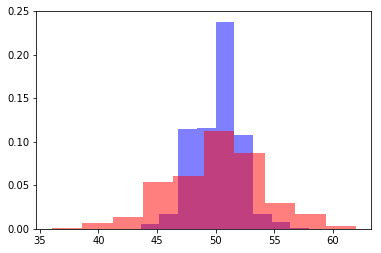

In [29]:
#illustrated here with two samples with same mean of 50
#np.random.normal(mean, std deviation, size)
skittles_fac_1 = np.random.normal(50, 2, size=5000)
skittles_fac_1 = skittles_fac_1.round().astype(int)
skittles_fac_1[:10]
skittles_fac_2 = np.random.normal(50, 4, size=5000)
skittles_fac_2 = skittles_fac_2.round().astype(int)
skittles_fac_2[:10]

#setting density=True normalizes the data so that the area underneath each is the same
plt.hist(skittles_fac_1, alpha=0.5, color='b', density=True)
plt.hist(skittles_fac_2, alpha=0.5, color='r', density=True);

In [30]:
#large p-value makes sense because our two means are the same
#this p-value doesn't allow us to reject the null hypothesis
#we operate under the assumption that the two means are the same
#we see that these two samples are obvisouly different though, 
ttest_ind(skittles_fac_1, skittles_fac_2)

Ttest_indResult(statistic=0.15054221339275364, pvalue=0.8803398856273693)

In [32]:
#if we want to detect and show that these sets are different
#we can use the KS test
#it takes this normalized historgram for two distributions 
#and creates cumulative probability distribution for two samples
#and measures larger difference for two cumulative distributions
#based on this difference it computes the p-value

#null hypothesis is that the 2 distributions are the same
#the really low p-value shows that the 2 distributions are NOT the same
from scipy.stats import ks_2samp
ks_2samp(skittles_fac_1, skittles_fac_2)

Ks_2sampResult(statistic=0.1634, pvalue=1.1715419467159992e-58)

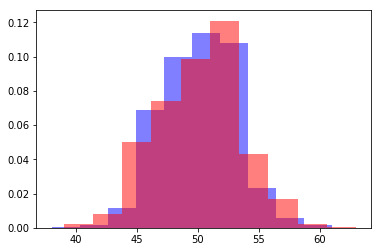

In [33]:
#changing the data to make these more similar
skittles_fac_1 = np.random.normal(50, 3, size=5000)
skittles_fac_1 = skittles_fac_1.round().astype(int)
skittles_fac_1[:10]
skittles_fac_2 = np.random.normal(50, 3.3, size=5000)
skittles_fac_2 = skittles_fac_2.round().astype(int)
skittles_fac_2[:10]

#setting density=True normalizes the data so that the area underneath each is the same
plt.hist(skittles_fac_1, alpha=0.5, color='b', density=True)
plt.hist(skittles_fac_2, alpha=0.5, color='r', density=True);

In [34]:
#because we have very large sample sizes, we are still able to get the p-value less than 0.05
ks_2samp(skittles_fac_1, skittles_fac_2)

Ks_2sampResult(statistic=0.0366, pvalue=0.002465208749609002)

In [36]:
#writing a function that creates two normal distributions
def get_two_norm_dist(mus, sigmas, sizes):
  #initializing an empty list, thats what we'll return
  dist_list = []
  #range 2 for 2 distributions
  for i in range(2):
    #distribution will generate first mu, sigma, and size
    dist = np.random.normal(mus[i], sigmas[i], size=sizes[i])
    #round it and turn it into an integer (may or may not be right thing to do depending on your data)
    dist = dist.round().astype(int)
    #append this to the list
    dist_list.append(dist)
  return dist_list

#now we can generate two distributions
dist_1, dist_2 = get_two_norm_dist(mus=(50, 50), sigmas=(3, 3.3), sizes=(1000, 500))

#and perform a ttest on them
ttest_ind(dist_1, dist_2)

#can not reject the null hypothesis because the P-value is large

Ttest_indResult(statistic=0.28217542259767536, pvalue=0.7778479818587736)

##Unfair Die Example - T-test vs. KS-Test

In [0]:
unfair_die = np.array(150*[1] + 130*[2] + 50*[3] + 50*[4] + 130*[5] + 150*[6])
fair_die = np.array(110*[1] + 110*[2] + 110*[3] + 110*[4] + 110*[5] + 110*[6])

In [38]:
unfair_die.mean()

3.5

In [39]:
fair_die.mean()

3.5

In [40]:
#normal t-test comparing means
ttest_ind(unfair_die, fair_die) #This shows highest possible value for P

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [41]:
#ks test comparing means and distribution
ks_2samp(unfair_die, fair_die) #another example that this can detect differences in distribution

Ks_2sampResult(statistic=0.09090909090909091, pvalue=0.008524685542396894)

##Central Limit Theorem
https://colab.research.google.com/drive/1HrCsKj9N3LYUqLiza2AVidg4izKY-i09#scrollTo=8V8RlyN4SaL0

#Confidence Intervals
##Determine the level of confidence for a possible outcome

Hypothesis testing is all about inferring some properties of the population, based on the sample.

Often times you don't know the size of the population, or the population is so large that you can't collect all the data about it. 

One of the inferences is that the sample mean is close to the population mean. 

Based on our sample data, we can say that the population mean lies within this range


<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [45]:
#some madeup data... say 45% of people will vote for A, or B,... as an example
pop = pd.Series(np.random.binomial(1, p=0.45, size=1000000))
pop.sum()

449476

In [0]:
from scipy import stats 

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  #this is a function that computes t for you
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  interval = stderr * t
  return (mean, mean - interval, mean + interval)

#returns mean and upper and lower bounds

In [47]:
#lets generate the confidence intervals manual first
#we'll do this with a sample size
sample_size = 100
sample = pop.sample(sample_size)
sample.head()

563042    0
100549    0
270385    1
134974    1
905346    1
dtype: int64

In [50]:
#lets find the mean, which tells us on average how these people will vote on average
sample_mean = sample.mean()
#remember to set the ddof to 1, it may make a difference here but mostly makes a difference in smaller sample sizes
sample_std = np.std(sample, ddof=1)
print(sample_mean, sample_std)

0.45 0.49999999999999994


##Standard Error

In [51]:
#now we can find the standard error
standard_error = sample_std/np.sqrt(sample_size)
standard_error

0.049999999999999996

##T-distribution table

In [52]:
#for T-distrubtions
#now we can get T, but where?
#they used to be found on tables found here
#http://uregina.ca/~gingrich/tt.pdf
#took 95% column and 100 row, found 1.984
#used 1.984 from 100 row, we don't have 100, but we have 99, so its close enough

#for Normal Distributions
#when samples get really large, use 1.96
#https://en.wikipedia.org/wiki/1.96


t = 1.984 # 95% confidence from table above
(sample_mean, sample_mean - t*standard_error, sample_mean + t*standard_error)

(0.45, 0.3508, 0.5492)

In [55]:
#comparing to the function above, we get fairly close results
confidence_interval(sample, confidence=0.95)

(0.45, 0.3507891524245659, 0.5492108475754341)

In [56]:
print('We can say with 95% confidence that on average, the population mean lies within 35%-54% with a mean of 45%.')

We can say with 95% confidence that on average, the population mean lies within 35%-54% with a mean of 45%.


#Chi squared Test Example from Class Notes

##Probability Density Function

A function that gives you the density of probability for *continuous* distributions. 

There are two types, continuous, or discrete. 

https://en.wikipedia.org/wiki/Probability_density_function

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/700px-Boxplot_vs_PDF.svg.png" width=400>

##Cumulative Distribution Function
https://en.wikipedia.org/wiki/Cumulative_distribution_function

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Normal_Distribution_CDF.svg/600px-Normal_Distribution_CDF.svg.png" width=400>


A good way to find the mean 'mu' of a normal distribution if you only have the CDF, is to look at where the area underneath the curve is 0.5. 

**Summary:**

Probability Density Functions for: continuos distributions

Probability Mass Function for: discrete distributions

Cumulative Distiribution Function is independent of either.
For discrete it would look like steps up, for continuous it would be smooth. 

<img src="https://www.researchgate.net/publication/48330115/figure/fig1/AS:393101261721610@1470734052767/Continuous-and-discrete-cumulative-distribution-functions.png" width=400>




#Derive Bayes Theorem from the Law of Conditional Probability
---



#Bayesian Inference

The general framework of bayesian inference is that it allows you to derive probabilities of certain events as new data and new information comes in. This can be very powerful. 

###One event happening

By definition, the total probability of all outcomes (events) if some variable (event space) $A$ is 1. That is:

$$P(A) = \sum_n P(A_n) = 1$$

and 

###Two events happening simultaneously

The law of total probability states:

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

In other words - the total probability of  𝐴  is equal to the sum of the conditional probability of  𝐴  on any given event  𝐵𝑛  times the probability of that event  𝐵𝑛 , and summed over all possible events in  𝐵 .

##The Law of Conditional Probability

What's the probability of something conditioned on something else? To determine this we have to go back to set theory and think about the intersection of sets:

The formula for actual calculation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

![Visualization of set intersection](https://upload.wikimedia.org/wikipedia/commons/9/99/Venn0001.svg)

Think of the overall rectangle as the whole probability space, $A$ as the left circle, $B$ as the right circle, and their intersection as the red area. Try to visualize the ratio being described in the above formula, and how it is different from just the $P(A)$ (not conditioned on $B$).

We can see how this relates back to the law of total probability - multiply both sides by $P(B)$ and you get $P(A|B)P(B) = P(A \cap B)$ - replaced back into the law of total probability we get $P(A) = \sum_n P(A \cap B_n)$.

This may not seem like an improvement at first, but try to relate it back to the above picture - if you think of sets as physical objects, we're saying that the total probability of $A$ given $B$ is all the little pieces of it intersected with $B$, added together. The conditional probability is then just that again, but divided by the probability of $B$ itself happening in the first place.

\begin{align}
P(A|B) &= \frac{P(A \cap B)}{P(B)}\\
\Rightarrow P(A|B)P(B) &= P(A \cap B)\\
P(B|A) &= \frac{P(B \cap A)}{P(A)}\\
\Rightarrow P(B|A)P(A) &= P(B \cap A)\\
\Rightarrow P(A|B)P(B) &= P(B|A)P(A) \\
P(A \cap B) &= P(B \cap A)\\
P(A|B) &= \frac{P(B|A) \times P(A)}{P(B)}
\end{align}

<img src="https://miro.medium.com/max/1378/1*LCoOH68FcIqiOcFApNQZtA.jpeg" width=600>

In [0]:
# 1) P(A and B) == P(B and A)
# 2) P(A given B) == P(A and B)/P(B) => P(A given B)*P(B) == P(A and B)
# 3) P(B given A) == P(B and A)/P(A) => P(B given A)*P(A) == P(B and A)

# P(A given B)*P(B) = P(B given A)*P(A)

# P(A given B) = P(B given A)*P(A)/P(B)

##Bayes Theorem Application - Drunk or Not?
What is the likelihood somebody really is drunk if they test positive? Some may guess it's 92% - the difference between the true positives and the false positives. But we have a prior belief of the background/true rate of drunk driving. Sounds like a job for Bayes' theorem!

$$
\begin{aligned}
P(Drunk | Positive) &= \frac{P(Positive | Drunk)P(Drunk)}{P(Positive)} \\
&= \frac{1 \times 0.001}{0.08} \\
&= 0.0125
\end{aligned}
$$

In other words, the likelihood that somebody is drunk given they tested positive with a breathalyzer in this situation is only 1.25% - probably much lower than you'd guess. This is why, in practice, it's important to have a repeated test to confirm (the probability of two false positives in a row is $0.08 * 0.08 = 0.0064$, much lower), and Bayes' theorem has been relevant in court cases where proper consideration of evidence was important.

In [57]:
#for the drunk example from class
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
    p_drunk = ((prob_positive_drunk * prob_drunk_prior) / (prob_positive)) * 100
    return p_drunk

print(prob_drunk_given_positive(1,.08,.001), '%')

1.25 %


#99% Sensitive and 99% Specific
This example comes from [Wikipedia](https://en.wikipedia.org/wiki/Bayes%27_theorem)

Suppose that a test for using a particular drug is 99% sensitive and 99% specific. That is, the test will produce 99% true positive results for drug users and 99% true negative results for non-drug users. Suppose that 0.5% of people are users of the drug. What is the probability that a randomly selected individual with a positive test is a drug user?

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/95c6524a3736c43e4bae139713f3df2392e6eda9)

Even if an individual tests positive, it is more likely that they do not use the drug than that they do. This is because the number of non-users is large compared to the number of users. The number of false positives outweighs the number of true positives. For example, if 1000 individuals are tested, there are expected to be 995 non-users and 5 users. From the 995 non-users, 0.01 × 995 ≃ 10 false positives are expected. From the 5 users, 0.99 × 5 ≈ 5 true positives are expected. Out of 15 positive results, only 5 are genuine.

The importance of specificity in this example can be seen by calculating that even if sensitivity is raised to 100% and specificity remains at 99% then the probability of the person being a drug user only rises from 33.2% to 33.4%, but if the sensitivity is held at 99% and the specificity is increased to 99.5% then the probability of the person being a drug user rises to about 49.9%.

In [58]:
#drug example from class

#4 parameters to pass in for the drug example
#Positive User
tru_pos = 0.99
#User
drug_user = 0.005
#Positive Non User
non_user = 0.01
#Non User
pos_user = .995

def prob_positive_given_random(tru_pos, drug_user, non_user, pos_user):
  p_user_plus = (tru_pos * drug_user) / ((tru_pos * drug_user) + (non_user * pos_user)) * 100
  return p_user_plus

print(round(prob_positive_given_random(tru_pos, drug_user, non_user, pos_user),3),'%')

33.221 %


In [80]:
#attempting to loop this

#4 parameters to pass in for the drug example
#Positive User
tru_pos = 0.99
#User
drug_user = 0.005
#Positive Non User
non_user = 0.01
#Non User
pos_user = .995

def prob_positive_given_random(tru_pos, drug_user, non_user, pos_user):
  posterior_list = []
  p_user_plus = (tru_pos * drug_user) / ((tru_pos * drug_user) + (non_user * pos_user))
  posterior_list.append(p_user_plus)
  return p_user_plus
  return posterior_list

print(round(prob_positive_given_random(tru_pos, drug_user, non_user, pos_user),3))

0.332


In [60]:
#what if we wanted another independent lab to check our results of the first test?
#we just update the prior numbers to the result of the first test, like this
#so, running a 2nd gets you closer

print(round(prob_positive_given_random(0.99, 0.33221, .01, .995),3),'%')

97.063 %


In [61]:
#what about a third time?
print(round(prob_positive_given_random(0.99, 0.97063, .01, .995),3),'%')
#now we can be sure that the test is not as random as it is initially

98.975 %


In [0]:
#function from class as opposed to my function written above
def bayes_theorem(prior, false_neg, false_pos, num_iter):
  #initiating an empty list
  posterior_list = []
  #range num_iter for 
  for i in range(num_iter):
    posterior = ((prior * false_neg) / ((prior * false_neg) + (false_pos * num_iter))) # write your code here
    posterior_list.append(posterior)
  return posterior_list

bayes_theorem(.99, .005, .01, .995);
bayes_theorem

In [82]:
#alex kims
def bayes_theorem(prior, false_neg, false_pos, num_iter):
  posterior_list = []
  posterior = prior
  for i in range(num_iter):
    posterior = (1-false_neg)*posterior/((1-false_neg)*posterior + false_pos*(1-posterior))
    posterior_list.append(posterior)
  return posterior_list

bayes_theorem(0.005, 0.01, 0.01, 15)

[0.33221476510067116,
 0.9801000000000001,
 0.9997949506335922,
 0.9999979283737839,
 0.9999999790744397,
 0.9999999997886307,
 0.999999999997865,
 0.9999999999999785,
 0.9999999999999998,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [0]:
#breaking down alex's code
#posterior = ((1 - .01) * .005) / (( 1 - .01 ) * .005 ) + (.01 * 1-.005)
#posterior = (.99 * .005) / (.99 * .005) + (.01 * .995)

In [75]:
#paul kutrich
def bayes(bga, a, b):
  num = bga * a
  not_a = 1 - a
  denom = num + b * not_a

  return num / denom

def repeat_bayes(bga, a, b, reps):
  for _ in range(reps):
    a = bayes(bga, a, b)
    print(a)

pos_g_drunk = .99
drunk = 0.001
pos = .01

repeat_bayes(pos_g_drunk, drunk, pos, 6)

0.09016393442622951
0.9075000000000001
0.9989714794017902
0.9999896003148012
0.9999998949515932
0.9999999989389049


#Calculate Bayesian Confidence Intervals

Class Notes:
https://colab.research.google.com/drive/1cQuMCerEOQSYOOgCOO4xAdSBRBHtOUe8#scrollTo=h-OP3v-VnIRj

In [86]:
import numpy as np
from scipy import stats

np.random.seed(seed=42)
coinflips = np.random.binomial(n=1, p=0.5, size=100)
coinflips

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [88]:
#defining the confidence interval function
def confidence_interval(data, alpha=.9): #accepting two arguments, data and alpha as confidence interval
  n = len(data) #size of our sample
  mean = sum(data)/n #the mean
  data = np.array(data) #converts the list to an array, if already an array it does not effect the data
  stderr = stats.sem(data) #computing standard error
  t = stats.t.ppf((1 + alpha) / 2.0, n-1) #computing t statistics
  interval = stderr * t #getting our interval to calculate lower and upper bounds
  return (mean , mean-interval, mean+interval)

#outputting confidence interval from coinflips
confidence_interval(coinflips)

(0.47, 0.3867125284491557, 0.5532874715508442)

In [93]:
#calculate this confidence interval using the bayesian method
stats.bayes_mvs(coinflips)

(Mean(statistic=0.47, minmax=(0.38671252844915566, 0.5532874715508442)),
 Variance(statistic=0.25680412371134015, minmax=(0.20215017434095595, 0.323311952657888)),
 Std_dev(statistic=0.5054540733507159, minmax=(0.44961113680708126, 0.5686052696360524)))

In [92]:
#if we are only interested in the first row we can do this:
mean_conf_inter,_,_ = stats.bayes_mvs(coinflips, alpha=0.9)
mean_conf_inter

Mean(statistic=0.47, minmax=(0.38671252844915566, 0.5532874715508442))

##Real World Experiment Design

Deploy a static A/B instrumented webpage

Evaluate and summarize findings from real-world A/B test data

#Type 1 Error

A type 1 error is when the null is true and you reject it.

#Type 2 Error
A type 2 error is when the null is false and you fail to reject it.

##Researchers need to confirm that certains pill contain a particular amount of active ingredient (not more, not less). What type of t-test should they use?

Two tailed test.

##Researchers need to confirm that the manufacturer produces no more than a certain percentage of defective products. What type of t-test should they use?

One tailed test.

##You want to do a study (based on people’s survey). You decided to collect data from sources that are more convenient than doing a randomized data collection. How might this choice affect your conclusion?

Biased sampling.

###A researcher wants to be thorough. She takes several samples to test her belief that the population mean is a certain value:  120.  To do so she forms an appropriate null hypothesis and alternative hypothesis: HA > 120 and selects alpha = 0.05: a) State the null hypothesis. b) She repeats the sampling process 40 times. How many times would you expect that she would make an error in her conclusion and reject H0 if indeed the population mean really is 120?

.95 * 40 = 38

40-38 = 2



##What is the CDF of a normal distribution?

The cumulative distribution function (CDF) of the standard normal distribution, usually denoted with the capital Greek letter (phi), is the integral. The related error function gives the probability of a random variable with normal distribution of mean 0 and variance 1/2 falling in the range. 

This can also be described as the area under the curve. 